# Credit Risk Modelling

In [15]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Data Exploration

In [2]:
cr_loan = pd.read_csv("cr_loan2.csv")
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
cr_loan.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Often, financial data is viewed as a pivot table in spreadsheets like Excel.

With cross tables, you get a high level view of selected columns and even aggregation like a count or average. For most credit risk models, especially for probability of default, columns like person_emp_length and person_home_ownership are common to begin investigating.

You will be able to see how the values are populated throughout the data, and visualize them. For now, you need to check how loan_status is affected by factors like homeownership status, loan grade, and loan percentage of income.

To see how the loan_status' is affected by the 'home_ownership_status' we calculate the corresponding cross table. The data have been grouped by 'loan_status' and 'pension homeownership' and the mean interest rate has been calculated.

In [4]:
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
            values = cr_loan['loan_int_rate'],
            aggfunc = 'mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


For 'loan_intent', we merely calculate the aggregates, adding margins = True, in order to get the totals 'All'.

In [25]:
display(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5340,1111,6451
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4422,1098,5520
VENTURE,4870,847,5717
All,25468,7108,32576


Finally, we create a cross table of home-ownership grouped by loan_status and loan_grade.

In [26]:
display(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1              
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3728  1933  658  178  36  0  239   324  321  \
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4220  2709  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

Create a cross table of home-ownership, loan status, and average loan_percent_income.

In [27]:
display(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
                  values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146527,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144602,0.264859


## Data Visualisation

Checking the structure of the data as well as seeing a snapshot helps us better understand what's inside the set. Similarly, visualizations provide a high level view of the data in addition to important trends and patterns. First, we may scatter plot the interest rate of the loan that a person receives with his personal income.

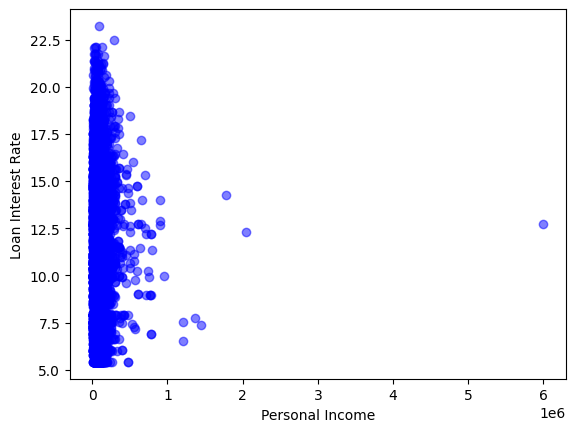

In [8]:
plt.scatter(cr_loan['person_income'], cr_loan['loan_int_rate'], c = 'blue', alpha = 0.5)
plt.xlabel('Personal Income')
plt.ylabel('Loan Interest Rate')
plt.show()

We may also look at the distribution of loan amounts with a histogram.

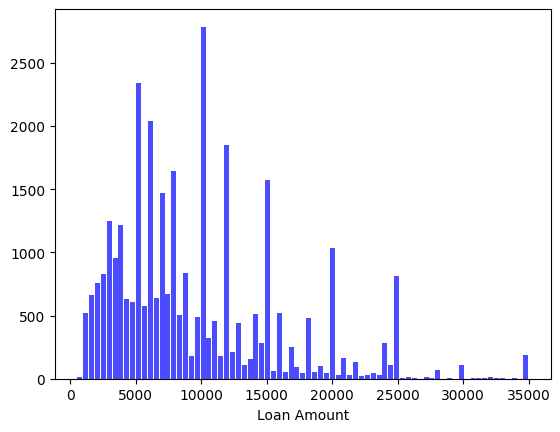

In [9]:
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

Another thing one may visualise, is the personal income vs age with a scatter plot.

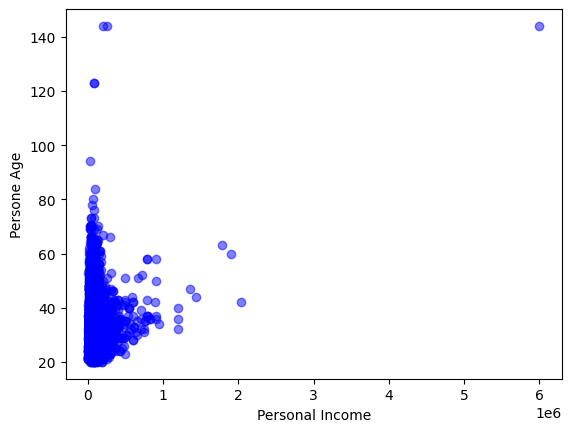

In [10]:
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c = 'blue', alpha = 0.5)
plt.xlabel('Personal Income')
plt.ylabel('Personal Age')
plt.show()

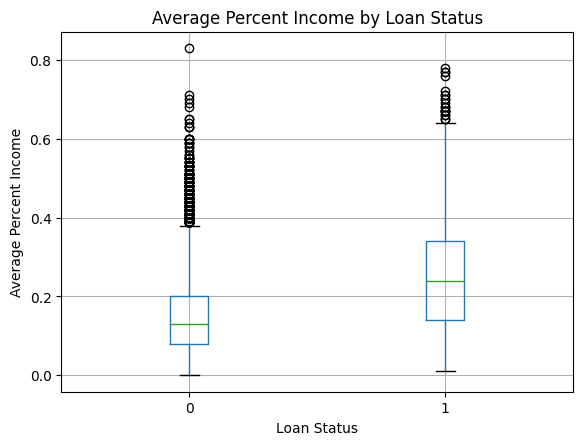

In [11]:
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Percent Income')
plt.suptitle('')
plt.show()

## Data Preprocessing

As with every machine learning problem, the first process we have to follow is preprocess the data. We are doing this for mainly two reasons. First, the training time of our model is reduces, and secondly, the performance of the model is increased.

### Outlier Detection

The first type of preparation we will look at is outlier detection and removal. Unfortunately, data entry systems producing bad data is fairly common. If the data entry specialist was tired or distracted, they can enter incorrect values into our system. It's also possible for data ingestion tools to create erroneous values in our data as a result of technical problems or system failures.

One way we can detect outliers, is to use cross tables with aggregate functions. Here, we call crosstab on our credit loan data just like before to find the average interest rate.

Below, we calculate the cross table of the maximum personal employment length with loan status and personal homeownership. We see that the maximum length of employment for some groups is 123 years. That is pretty much impossible, and we deduce tha there is a faulty entry. A sensible maximum employment length is for example 60 years. Therefore, we can drop the entries with personal employment length over 60. After that, we calculate the new cross table with aggregate functions min and max.

In [17]:
print('Cross table before outlier removal:')
display(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max').round(2))
indices = cr_loan[cr_loan['person_emp_length'] > 60].index
cr_loan2 = cr_loan.drop(indices)
print('Cross table after outlier removal:')
display(pd.crosstab(cr_loan2['loan_status'],cr_loan2['person_home_ownership'],
                  values=cr_loan2['person_emp_length'], aggfunc=['min','max']))

Cross table before outlier removal:


person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


Cross table after outlier removal:


min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

We can also detect outliers with the use of visualisation tools. For example, if we scatter plot the personal age with the loan amount, we will see that there are at least four people with age over 120 years. That is likely a faulty entry, and we would like to drop them, by making the assumption that is very unlikely that a person over 100 applies for a loan. Finally, we plot the same scatter plot with a heat map on loan status. Red is the defaulted and blue is not.

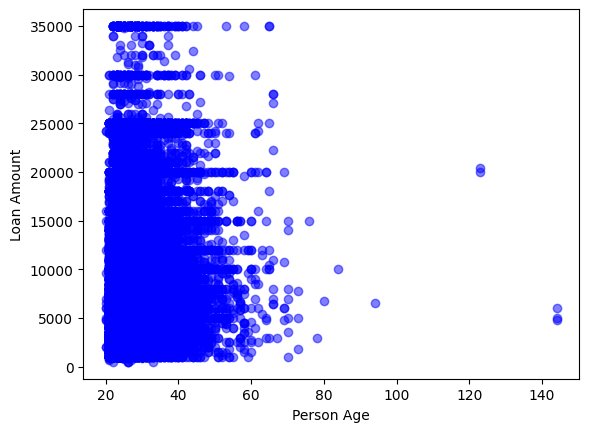

In [18]:
plt.scatter(cr_loan2['person_age'], cr_loan2['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

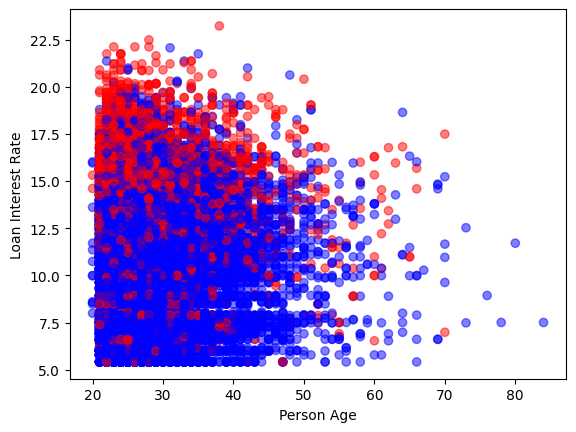

In [19]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan3 = cr_loan.drop(cr_loan2[cr_loan2['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan3['person_age'], cr_loan3['loan_int_rate'],
            c = cr_loan3['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

### Handling Missing Data

With the term missing data we mean that there are entries with either nan or empty string entries.

One issue with missing data is similar to problems caused with outliers in that it negatively impacts predictive model performance. It can bias our model in unanticipated ways, which can affect how we predict defaults. This could result in us predicting a large number of defaults that are not actually defaults because the model is biased towards defaults. Also, many machine learning models in Python do not automatically ignore missing values, and will often throw errors and cease training.

So, how do we handle missing data? Most often, it is handled in one of three ways. Sometimes we need to replace missing values. This could be replacing a null with the average value of that column. Other times we remove the row with missing data all together. For example, if there are nulls in loan amount, we should drop those rows entirely. We sometimes keep missing values as well. This, however, is not the case with most loan data. Understanding the data will direct you towards one of these three actions.

For example, if the loan status is null, it's possible that the loan was recently processed in our system. Sometimes there is a data delay, and additional time needed for processing. In this case, we should just remove the whole row. Another example is where the person's age is missing. Here, we might be able to replace the missing age values with the median of everyone's age.

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length   
105          22          12600              MORTGAGE                NaN  \
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status   
105           PERSONAL          A       2000           5.42            1  \
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

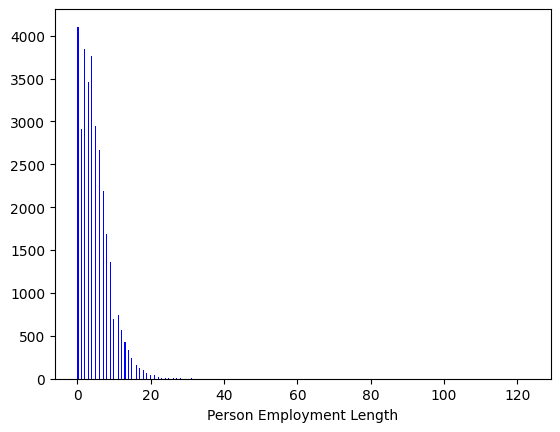

In [23]:
cr_loan = cr_loan3
# Print a null value column array
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [24]:
# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3115
